In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

### RGB_Color & Make_Triangle_Region

In [4]:
# each [] list represent one pixel
'''
 ---------
| X0   X1 |
| X0   X1 |
| X0   X1 |    x  3 
| X0   X1 |
 ---------
'''
im =  np.asarray([[[100, 101, 102],      #X0
                   [220, 222, 224]],     #X1
                  [[103, 103, 104], 
                   [225, 226, 227]],
                  [[105, 106, 107], 
                   [228, 229, 230]],
                  [[108, 109, 110], 
                   [231, 232, 233]]])

In [6]:
im.shape #[0] = row/y size
         #[1] = column/x size
         #[2] = RGB Value

(4, 2, 3)

In [7]:
im[:,:,0]  #Slice for Red Values

array([[100, 220],
       [103, 225],
       [105, 228],
       [108, 231]])

In [8]:
ysize = im.shape[0]    #row
xsize = im.shape[1]    #columns
im_copy = im

# Define color selection criteria
###### MODIFY THESE VARIABLES TO MAKE YOUR COLOR SELECTION
red_threshold = 255*0.78
green_threshold = 255*0.78
blue_threshold = 255*0.78
print('Threshold', 255*0.78, 'Is is 78% of RGB Value.')
######

rgb_threshold = [red_threshold, green_threshold, blue_threshold]
# Do a boolean or with the "|" character to identify
# pixels below the thresholds
thresholds = (im[:,:,0] < rgb_threshold[0]) | (im[:,:,1] < rgb_threshold[1]) | (im[:,:,2] < rgb_threshold[2])
print('thers', thresholds.shape)
im_copy[thresholds] = [0,0,0]

Threshold 198.9 Is is 78% of RGB Value.
thers (4, 2)


In [9]:
# less values pixels make RGB[0, 0, 0] == black
im_copy

array([[[  0,   0,   0],
        [220, 222, 224]],

       [[  0,   0,   0],
        [225, 226, 227]],

       [[  0,   0,   0],
        [228, 229, 230]],

       [[  0,   0,   0],
        [231, 232, 233]]])

In [10]:
# Define a triangle region of interest 
# Keep in mind the origin (x=0, y=0) is in the upper left in image processing
# Note: if you run this code, you'll find these are not sensible values!!
# But you'll get a chance to play with them soon in a quiz 
left_bottom = [0, 539]
right_bottom = [900, 300]
apex = [400, 0]

# Fit lines (y=Ax+B) to identify the  3 sided region of interest
# np.polyfit() returns the coefficients [A, B] of the fit
print('11:', (left_bottom[0], apex[0]), '12:', (left_bottom[1], apex[1]))
print('21:', (right_bottom[0], apex[0]), '22:', (right_bottom[1], apex[1]))
print('31:', (left_bottom[0], right_bottom[0]), '32:', (left_bottom[1], right_bottom[1]),'\n')

fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)
print('fit_left:', fit_left)
print('fit_right:', fit_right)
print('fit_bottom:', fit_bottom, '\n')

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, 960), np.arange(0, 540))
print('XX:',XX, type(XX), XX.shape)
print('YY:',YY, type(YY), YY.shape)

region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & \
                    (YY > (XX*fit_right[0] + fit_right[1])) & \
                    (YY < (XX*fit_bottom[0] + fit_bottom[1]))



11: (0, 400) 12: (539, 0)
21: (900, 400) 22: (300, 0)
31: (0, 900) 32: (539, 300) 

fit_left: [  -1.3475  539.    ]
fit_right: [   0.6 -240. ]
fit_bottom: [ -2.65555556e-01   5.39000000e+02] 

XX: [[  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 ..., 
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]
 [  0   1   2 ..., 957 958 959]] <class 'numpy.ndarray'> (540, 960)
YY: [[  0   0   0 ...,   0   0   0]
 [  1   1   1 ...,   1   1   1]
 [  2   2   2 ...,   2   2   2]
 ..., 
 [537 537 537 ..., 537 537 537]
 [538 538 538 ..., 538 538 538]
 [539 539 539 ..., 539 539 539]] <class 'numpy.ndarray'> (540, 960)


### Using_openCV & Canny_Line_Detection & Hough_Transform

In [82]:
img = mpimg.imread('exit_ramp.jpg')
#plt.imshow(img);

In [83]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#plt.imshow(gray, cmap='gray');

In [84]:
def canny(img, kernal_size=5, low=50, high=150):
    low_threshold = low
    high_threshold = high
    blur_gray = cv2.GaussianBlur(img, (kernal_size, kernal_size), 0)
    print(blur_gray.shape)
    edges = cv2.Canny(blur_gray, low_threshold, high_threshold)
    plt.figure(figsize=(13,10))
    plt.imshow(edges, cmap='Greys_r');
    return edges

(540, 960)


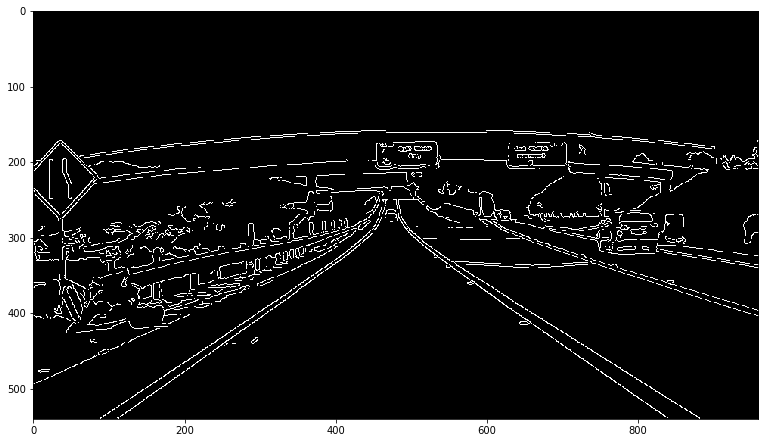

In [85]:
edges = canny(gray)

In [102]:
y, x = img.shape[:2]
x, y

(960, 540)

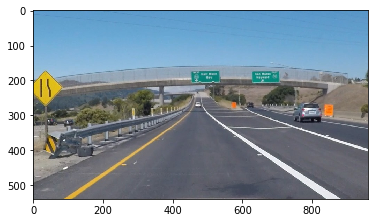

In [87]:
#original image
plt.imshow(img);

In [103]:
vertices = np.array([[(50, y),(x/2-28, y/2+10), (x/2+28, y/2+10), (x-50, y)]], dtype=np.int32)
vertices, vertices.shape

(array([[[ 50, 540],
         [452, 280],
         [508, 280],
         [910, 540]]], dtype=int32), (1, 4, 2))

In [104]:
# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255        # since gray img, no need to [255, 255, 255] == white

In [105]:
# This time we are defining a four sided polygon to mask
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

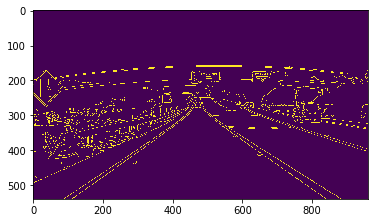

In [106]:
plt.imshow(edges);

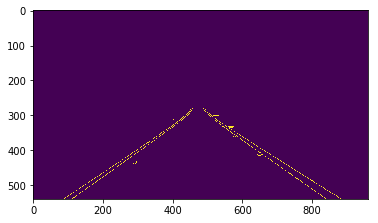

In [107]:
# output of cv2.bitwise_and(edges, mask)
plt.imshow(masked_edges);

In [108]:
masked_edges.shape

(540, 960)

In [109]:
line_image = np.copy(img)*0

In [110]:
img.shape, line_image.shape

((540, 960, 3), (540, 960, 3))

(540, 960) (540, 960, 3)


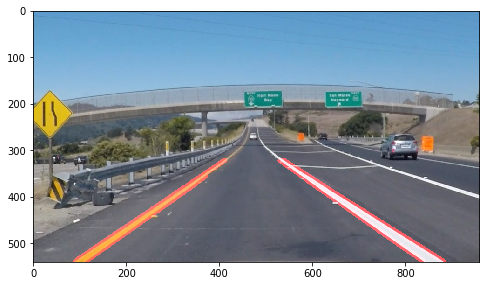

In [137]:
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 1                  # 2
theta = np.pi/180
threshold = 60           # 15
min_line_length = 80     # 40
max_line_gap = 10        # 20
line_image = np.copy(img)*0 #creating a blank to draw lines on

# Run Hough on edge detected image
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on the blank
for line in lines:
    #print(line)
    for x1,y1,x2,y2 in line:
        cv2.line(line_image, (x1,y1), (x2,y2), (255,0,0), 10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 
print(edges.shape, color_edges.shape)
#plt.imshow(color_edges);

# Draw the lines on the edge image
combo_ = cv2.addWeighted(color_edges, 1, line_image, 1, 0)
combo = cv2.addWeighted(img, 1, line_image, 1, 0) 
plt.figure(figsize=(8,8))
plt.imshow(combo);

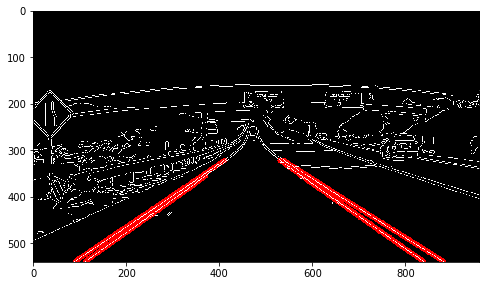

In [141]:
plt.figure(figsize=(8,8))
plt.imshow(combo_);